## Random Forest Exercises 

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
#python files imports
import acquire
import prepare

Continue working in your ```model``` file with titanic data to do the following:

In [4]:
titanic = acquire.get_titanic_data()

In [5]:
X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.prep_titanic_6(titanic)

In [6]:
X_train.columns

Index(['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'class_Second',
       'class_Third', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [7]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the ```random_state``` accordingly and setting ```min_samples_leaf = 1``` and ```max_depth = 10```.

In [9]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [16]:
display(X_train.columns)
print(type(rf.feature_importances_))

pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

Index(['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'class_Second',
       'class_Third', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

<class 'numpy.ndarray'>


,Feature,Importance
0,age,0.212240
1,sibsp,0.056563
2,parch,0.032821
3,fare,0.247212
4,alone,0.017445
5,sex_male,0.309763
6,class_Second,0.020140
7,class_Third,0.063835
8,embark_town_Queenstown,0.012958
9,embark_town_Southampton,0.027025


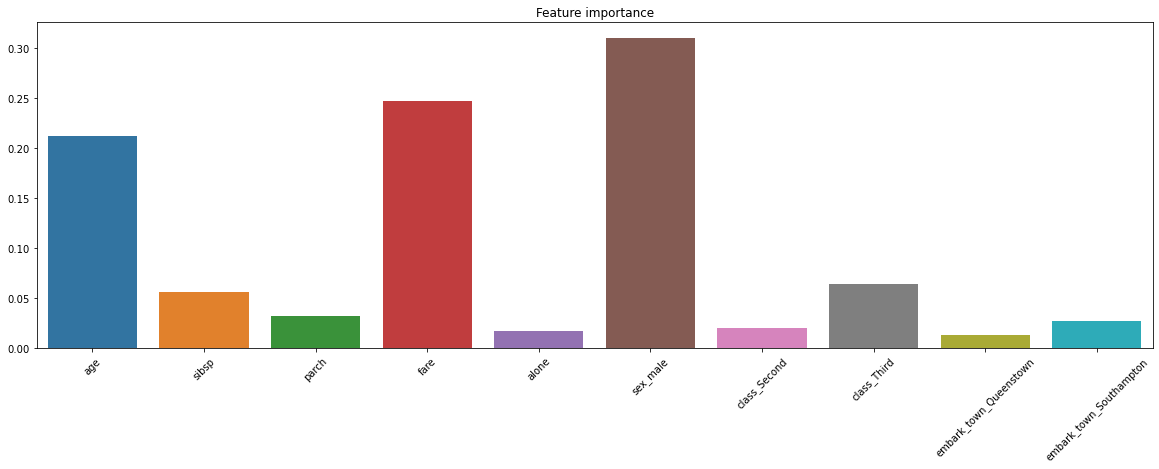

In [29]:
plt.figure(figsize = (20, 6))
#plt.bar(X_train.columns, rf.feature_importances_)
sns.barplot(x = X_train.columns, y = rf.feature_importances_)
plt.xticks(rotation = 45)
plt.title('Feature importance')
plt.show()

In [30]:
#predict survival
y_pred = rf.predict(X_train)

In [32]:
#esmimate probability of each person to survive
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[:2]

array([[0.73437185, 0.26562815],
       [0.25222222, 0.74777778]])

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [33]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [34]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[307   0]
 [ 14 177]]


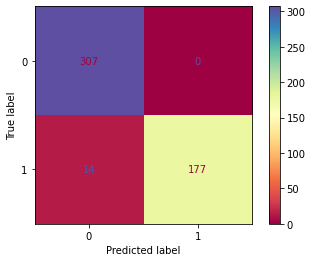

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot(cmap='Spectral')

plt.show()

In [44]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       307
           1       1.00      0.93      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [46]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [87]:
TN, FP, FN, TP

(307, 0, 14, 177)

In [47]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [66]:
ALL = TP + FP + FN + TN

accuracy = round((TP + TN)/ALL, 2)
true_positive_rate = sensitivity = recall = power = round(TP/(TP+FN), 2)
false_positive_rate = false_alarm_ratio = fallout = round(FP/(FP+TN), 2)
true_negative_rate = specificity = selectivity = round(TN/(TN+FP), 2)
false_negative_rate = miss_rate = round(FN/(FN+TP), 2)
precision = PPV = round(TP/(TP+FP), 2)
f1_score = round(2*(precision*recall)/(precision+recall), 2)
support_pos = int(TP + FN)
support_neg = int(FP + TN)

In [49]:
rates = ['Accuracy', 
         'True Positive Rate /Recall', 
         'False Positive Rate', 
         'True Negative Rate', 
         'False Negative Rate',
         'Precision', 
         'F1 Score',
         'Support Positive',
         'Support Negative']

In [67]:
values = pd.Series([accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, 
         precision, f1_score, support_pos, support_neg])

In [64]:
len(rates) == len(values)

True

In [68]:
pd.DataFrame({'Score Name':rates, 'Scores':values})

,Score Name,Scores
0,Accuracy,0.97
1,True Positive Rate /Recall,0.93
2,False Positive Rate,0.00
3,True Negative Rate,1.00
4,False Negative Rate,0.07
5,Precision,1.00
6,F1 Score,0.96
7,Support Positive,191.00
8,Support Negative,307.00


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [6]:
metrics = []

for msl in range(1, 11):
    for depth in range(10, 0, -1):
        #create random forest
        rf = RandomForestClassifier(max_depth=depth, min_samples_leaf=msl, random_state=123)
        #fit the model
        rf.fit(X_train, y_train)
        
        in_sample_accuracy = rf.score(X_train, y_train)
        
        out_sample_accuracy = rf.score(X_validate, y_validate)
        
        difference = abs(out_sample_accuracy - in_sample_accuracy)
        
        predictions = rf.predict(X_validate)
        TN, FP, FN, TP = confusion_matrix(y_validate, predictions).ravel()
        
        output = {
            'max_depth': depth,
            'min_samples_leaf': msl,
            'train_accuracy': in_sample_accuracy,
            'validate_accuracy': out_sample_accuracy,
            'false_positive': FP,
            'false_negative': FN,
            'difference': difference
            }
        metrics.append(output)

In [7]:
df = pd.DataFrame(metrics)

In [8]:
df.head()

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,false_positive,false_negative,difference
0,10,1,0.971888,0.817757,17,22,0.154131
1,9,1,0.963855,0.813084,17,23,0.150771
2,8,1,0.943775,0.813084,14,26,0.130691
3,7,1,0.913655,0.813084,15,25,0.100571
4,6,1,0.887550,0.813084,12,28,0.074466


In [80]:
best_scores = df[(df.train_accuracy == df.train_accuracy.max()) |
                (df.validate_accuracy == df.validate_accuracy.max()) 
                (df.difference == df.difference.min())]

In [111]:
df[df.difference == df.difference.min()]

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,false_positive,false_negative,difference
9,1,1,0.779116,0.761682,15,36,0.017434
19,1,2,0.779116,0.761682,15,36,0.017434
29,1,3,0.779116,0.761682,15,36,0.017434
39,1,4,0.779116,0.761682,15,36,0.017434
49,1,5,0.779116,0.761682,15,36,0.017434
59,1,6,0.779116,0.761682,15,36,0.017434
69,1,7,0.779116,0.761682,15,36,0.017434
79,1,8,0.779116,0.761682,15,36,0.017434
89,1,9,0.779116,0.761682,15,36,0.017434
99,1,10,0.779116,0.761682,15,36,0.017434


In [14]:
df[(df.validate_accuracy > 0.8) & (df.difference < 0.05)]

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,false_positive,false_negative,difference
5,5,1,0.857430,0.813084,10,30,0.044346
6,4,1,0.849398,0.813084,12,28,0.036313
16,4,2,0.847390,0.813084,12,28,0.034305
26,4,3,0.851406,0.808411,12,29,0.042994
36,4,4,0.847390,0.808411,12,29,0.038978
46,4,5,0.845382,0.803738,12,30,0.041643
56,4,6,0.845382,0.803738,12,30,0.041643
66,4,7,0.843373,0.803738,12,30,0.039635
76,4,8,0.847390,0.803738,12,30,0.043651


In [12]:
df.sort_values(by = ['difference', 'validate_accuracy', 'false_negative'], ascending = [True, False, True]).head()

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,false_positive,false_negative,difference
9,1,1,0.779116,0.761682,15,36,0.017434
19,1,2,0.779116,0.761682,15,36,0.017434
29,1,3,0.779116,0.761682,15,36,0.017434
39,1,4,0.779116,0.761682,15,36,0.017434
49,1,5,0.779116,0.761682,15,36,0.017434


In [107]:
round(df.describe().loc[['mean', 'min', 'max'], 'train_accuracy':'difference'].T, 4)

,mean,min,max
train_accuracy,0.8531,0.7791,0.9719
validate_accuracy,0.7930,0.7617,0.8271
false_positive,12.6400,9.0000,17.0000
false_negative,31.6600,22.0000,36.0000
difference,0.0601,0.0174,0.1541


5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In-sample data: the best perform max_depth = 10. But it overfits, even not so badly as the decision tree classifier.

The min differences in evaluation metrics between train and validate sets are with the max_depth = 1

I would say the best performing model is where the ```max_depth = 4``` and ```min_sample_leaf = 2```

In [18]:
df.iloc[[16]]

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,false_positive,false_negative,difference
16,4,2,0.84739,0.813084,12,28,0.034305
